<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from flask import Flask, render_template 
import pandas as pd
import requests
from bs4 import BeautifulSoup 
from io import BytesIO
import base64
import matplotlib.pyplot as plt

In [2]:
app = Flask(__name__)

In [36]:
# to get data from web (scrapping)
url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019')
url_get.content[1:]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://monexnews.com/" target="_self" />\n<title>Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews</title>\n<meta name="description" content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " />\n<meta name="keywords" content="Kurs yen, jpy, nilai tukar yen, monexnews" />\n<meta property="og:image" content="favicon.jpg" />\n<meta name="author" content="Ultimaengine.com" />\n<meta name="robots" content="follow, index" />\n<meta name="revisit-after" content="7 days" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<meta name="google-site-verificatio

In [38]:
# for tidyness purpose
soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [50]:
#Find the key to get the information
table = soup.find('table', attrs={'class':'table'})
print(table.prettify()[1:1000])

table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   31 Desember 2019
  </td>
  <td>
   128,62
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr>
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   27 Desember 2019
  </td>
  <td>
   128,11
  </td>
  <td>
   126,83
  </td>
 </tr>
 <tr>
  <td>
   26 Desember 2019
  </td>
  <td>
   128,27
  </td>
  <td>
   126,98
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   23 Desember 2019
  </td>
  <td>
   128,39
  </td>
  <td>
   127,10
  </td>
 </tr>
 <tr>
  <td>
   20 Desember 2019
  </td>
  <td>
   128,63
  </td>
  <td>
   127,34
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   19 Desember 2019
  </td>
  <td>
   128,24
  </td>
  <td>
   126,93
  </td>
 </tr>
 <tr>
  <td>
   18 Desember 2019
  </td>
  <td>
   128,64
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr class="verySof


In [51]:
tr = table.find_all('tr')
tr[:] #call founded tr

[<tr>
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>31 Desember 2019</td>
 <td>128,62</td>
 <td>127,32</td>
 </tr>, <tr>
 <td>30 Desember 2019</td>
 <td>128,30</td>
 <td>127,02</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>27 Desember 2019</td>
 <td>128,11</td>
 <td>126,83</td>
 </tr>, <tr>
 <td>26 Desember 2019</td>
 <td>128,27</td>
 <td>126,98</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>23 Desember 2019</td>
 <td>128,39</td>
 <td>127,10</td>
 </tr>, <tr>
 <td>20 Desember 2019</td>
 <td>128,63</td>
 <td>127,34</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>19 Desember 2019</td>
 <td>128,24</td>
 <td>126,93</td>
 </tr>, <tr>
 <td>18 Desember 2019</td>
 <td>128,64</td>
 <td>127,32</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>17 Desember 2019</td>
 <td>128,62</td>
 <td>127,33</td>
 </tr>, <tr>
 <td>16 Desember 2019</td>
 <td>128,67</td>
 <td>127,36</td>
 </tr>, <tr class="verySoftGreyBg">
 <td>13 Desember 2019</td>
 <td>128,30</td>
 <td>127,02</

In [67]:
temp = [] #initiating a tuple

for i in range(1, len (tr)):
    row = table.find_all('tr')[i]
        
    #get periode
    Tanggal = row.find_all('td')[0].text
    Tanggal = Tanggal.replace(u'\xa0', u' ') #for removing the excess whitespace 
    
    #get ASK
    Kurs_jual = row.find_all('td')[1].text
    Kurs_jual = Kurs_jual.strip() #for removing the excess whitespace
    
    #get BID
    Kurs_beli = row.find_all('td')[2].text
    Kurs_beli = Kurs_beli.strip() #for removing the excess whitespace

    temp.append((Tanggal,Kurs_jual,Kurs_beli))
temp

[('31 Desember 2019', '128,62', '127,32'),
 ('30 Desember 2019', '128,30', '127,02'),
 ('27 Desember 2019', '128,11', '126,83'),
 ('26 Desember 2019', '128,27', '126,98'),
 ('23 Desember 2019', '128,39', '127,10'),
 ('20 Desember 2019', '128,63', '127,34'),
 ('19 Desember 2019', '128,24', '126,93'),
 ('18 Desember 2019', '128,64', '127,32'),
 ('17 Desember 2019', '128,62', '127,33'),
 ('16 Desember 2019', '128,67', '127,36'),
 ('13 Desember 2019', '128,30', '127,02'),
 ('12 Desember 2019', '130,04', '128,71'),
 ('11 Desember 2019', '129,65', '128,34'),
 ('10 Desember 2019', '129,56', '128,26'),
 ('09 Desember 2019', '129,76', '128,44'),
 ('06 Desember 2019', '129,78', '128,45'),
 ('05 Desember 2019', '130,10', '128,77'),
 ('04 Desember 2019', '130,79', '129,45'),
 ('03 Desember 2019', '130,15', '128,82'),
 ('02 Desember 2019', '129,36', '128,04'),
 ('29 November 2019', '129,44', '128,12'),
 ('28 November 2019', '129,47', '128,15'),
 ('27 November 2019', '129,84', '128,53'),
 ('26 Novem

In [68]:
#remove the header
temp = temp[::-1]
temp

[('02 Januari 2019', '132,89', '131,54'),
 ('03 Januari 2019', '135,44', '134,08'),
 ('04 Januari 2019', '133,51', '132,17'),
 ('07 Januari 2019', '130,86', '129,51'),
 ('08 Januari 2019', '129,84', '128,52'),
 ('09 Januari 2019', '130,31', '129,00'),
 ('10 Januari 2019', '131,22', '129,88'),
 ('11 Januari 2019', '130,62', '129,31'),
 ('14 Januari 2019', '130,52', '129,19'),
 ('15 Januari 2019', '130,56', '129,23'),
 ('16 Januari 2019', '131,11', '129,75'),
 ('17 Januari 2019', '130,61', '129,27'),
 ('18 Januari 2019', '130,37', '129,03'),
 ('21 Januari 2019', '130,31', '128,98'),
 ('22 Januari 2019', '130,39', '129,07'),
 ('23 Januari 2019', '130,05', '128,75'),
 ('24 Januari 2019', '129,79', '128,48'),
 ('25 Januari 2019', '129,68', '128,37'),
 ('28 Januari 2019', '128,97', '127,65'),
 ('29 Januari 2019', '129,74', '128,43'),
 ('30 Januari 2019', '129,79', '128,47'),
 ('31 Januari 2019', '129,92', '128,60'),
 ('01 Februari 2019', '129,05', '127,75'),
 ('04 Februari 2019', '128,24', '

In [69]:
#creating the dataframe
kurs = pd.DataFrame(temp, columns = ('Tanggal','Kurs_jual','Kurs_beli'))
kurs.head()

,Tanggal,Kurs_jual,Kurs_beli
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"


In [72]:
#data wranggling -  try to change the data type to right data type
import dateparser

# convert period to standard format in phyton
dateparser.parse('02 Januari 2020')

kurs['Tanggal'] = kurs['Tanggal'].apply(lambda x: dateparser.parse(x))

In [74]:
# change coma with dot to make data type floating
kurs['Kurs_jual'] = kurs['Kurs_jual'].str.replace("," , ".",regex = True)
kurs['Kurs_beli'] = kurs['Kurs_beli'].str.replace("," , ".",regex = True)

#convert data type
kurs[['Kurs_jual', 'Kurs_beli']] = kurs[['Kurs_jual', 'Kurs_beli']].astype('float64')
kurs.dtypes

Tanggal      datetime64[ns]
Kurs_jual           float64
Kurs_beli           float64
dtype: object

In [75]:
kurs = kurs.set_index("Tanggal")

#end of data wranggling

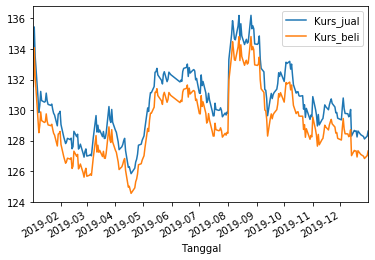

In [76]:
kurs.plot()

In [77]:
@app.route("/")
def index():
    kurs = scrap('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019') # insert url here

SyntaxError: 'return' outside function (<ipython-input-79-024147f03a8e>, line 16)

<Figure size 1500x600 with 0 Axes>

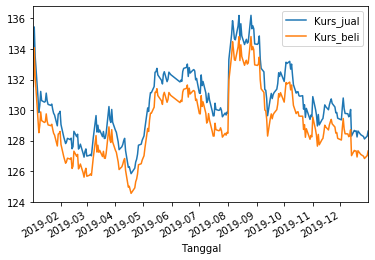

In [79]:
#This part for rendering matplotlib
fig = plt.figure(figsize=(5,2),dpi=300)
kurs.plot()
    
#Do not change this part
plt.savefig('plot1',bbox_inches="tight") 
figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
result = str(figdata_png)[2:-1]

#this is for rendering the table
kurs = kurs.to_html(classes=["table table-bordered table-striped table-dark table-condensed"])

return render_template("index.html", table=df, result=result)

In [ ]:
if __name__ == "__main__": 
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


<class 'bs4.BeautifulSoup'>
table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   31 Desember 2019
  </td>
  <td>
   128,62
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr>
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   27 Desember 2019
  </td>
  <td>
   128,11
  </td>
  <td>
   126,83
  </td>
 </tr>
 <tr>
  <td>
   26 Desember 2019
  </td>
  <td>
   128,


[2020-05-16 15:27:34,081] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\DITJENPPI_06\anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\DITJENPPI_06\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    return self.finalize_request(rv)
  File "C:\Users\DITJENPPI_06\anaconda3\lib\site-packages\flask\app.py", line 1967, in finalize_request
    response = self.make_response(rv)
  File "C:\Users\DITJENPPI_06\anaconda3\lib\site-packages\flask\app.py", line 2097, in make_response
    "The view function did not return a valid response. The"
TypeError: The view function did not return a valid response. The function either returned None or ended without a return statement.
127.0.0.1 - - [16/May/2020 15:27:34] "GET / HTTP/1.1" 500 -
127.0.0.1 - - [16/May/2020 15:27:34] "GET /favicon.ico HTTP/1.1" 404 -


Dari hasil scrapping data Kurs Yen to IDR Tahun 2019 diketahui bahwa Kurs menempati posisi terendah pada Tanggal 18 April 2019 dengan perolehan nilai yaitu:
1. Kurs Jual sebesar 125,84
2. Kurs Beli 124,55 

Kurs menempati posisi tertinggi pada Tanggal 26 Agustus 2019 dengan perolehan nilai, yaitu:
1. Kurs Jual sebesar 136,20 
2. Kurs Beli 134,81 